In [4]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
from time import time
# import dill
import pickle
import glob
import importlib
import numpy as np
import scipy as sp
import scipy.misc
import pandas as pd
import re
import itertools
from scanf import scanf
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm, PowerNorm, Normalize
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate, optimize, sparse
from scipy.interpolate import interp1d, interp2d
from IPython.display import display, HTML, Math
from scipy import interpolate
from tqdm.notebook import tqdm as tqdm_notebook

# from act_act_src import baseClass
from act_src import particleClass
from act_src import interactionClass
from act_src import problemClass
from act_src import relationClass
from act_codeStore.support_class import *
from act_codeStore import support_fun as spf
from act_codeStore import support_fun_calculate as spc

PWD = os.getcwd()
np.set_printoptions(linewidth=110, precision=5)

params = {'animation.html': 'html5',
          'font.family':    'sans-serif',
          'font.size':      15, }
preamble = r' '
preamble = preamble + '\\usepackage{bm} '
preamble = preamble + '\\usepackage{amsmath} '
preamble = preamble + '\\usepackage{amssymb} '
preamble = preamble + '\\usepackage{mathrsfs} '
preamble = preamble + '\\DeclareMathOperator{\\Tr}{Tr} '
params['text.latex.preamble'] = preamble
params['text.usetex'] = True
plt.rcParams.update(params)

In [5]:
from act_codeStore.support_class import *
from act_codeStore import support_fun as spf
from act_codeStore import support_fun_calculate as spc
from act_codeStore import support_fun_show as sps
from collectiveFish.do_calculate import calculate_fun_dict, prbHandle_dict, rltHandle_dict, ptcHandle_dict

## Daniel S Calovi et al 2014 New J. Phys. 16 015026

make folder try_dbgBokaiZhang
 
Collective motion solve, Zhang Ji, 2021. 
########################################################################
Generate Problem. 
  All the particles have a unified speed=1.000000, 
  All the particles have a unified length=-1.000000, 
  Generate 50 particles with random seed 10
 
Solve, start time: 2023-08-14 10:47:00
 
Information about try_dbgBokaiZhang (behavior2DProblem): 
  This is a 2 dimensional problem, contain 50 objects. 
  update function: 1fe, update order: (0, 0), max loop: 1000000000
  t0=0.000000, t1=100.000000, dt=0.010000
  save log file to try_dbgBokaiZhang/log.try_dbgBokaiZhang 
  save pickle file to try_dbgBokaiZhang/pickle.try_dbgBokaiZhang 
  rotational noise: 0.000000, translational noise: 0.000000
  align: 1.000000, attract: 1.000000, viewRange: 1.000000, 
 
Information about selfPropelled2D (selfPropelled2D): 
  None
 
Information about AlignAttract2D (AlignAttract2D): 
  None
 
Information about Relation2D (VoronoiBaseRelat

  try_dbgBokaiZhang:   0%|          | 0/100 [00:00<?, ?it/s]

Solve, finish time: 2023-08-14 10:47:28
Solve, usage time: 0:00:28.478080
 


<Axes: >

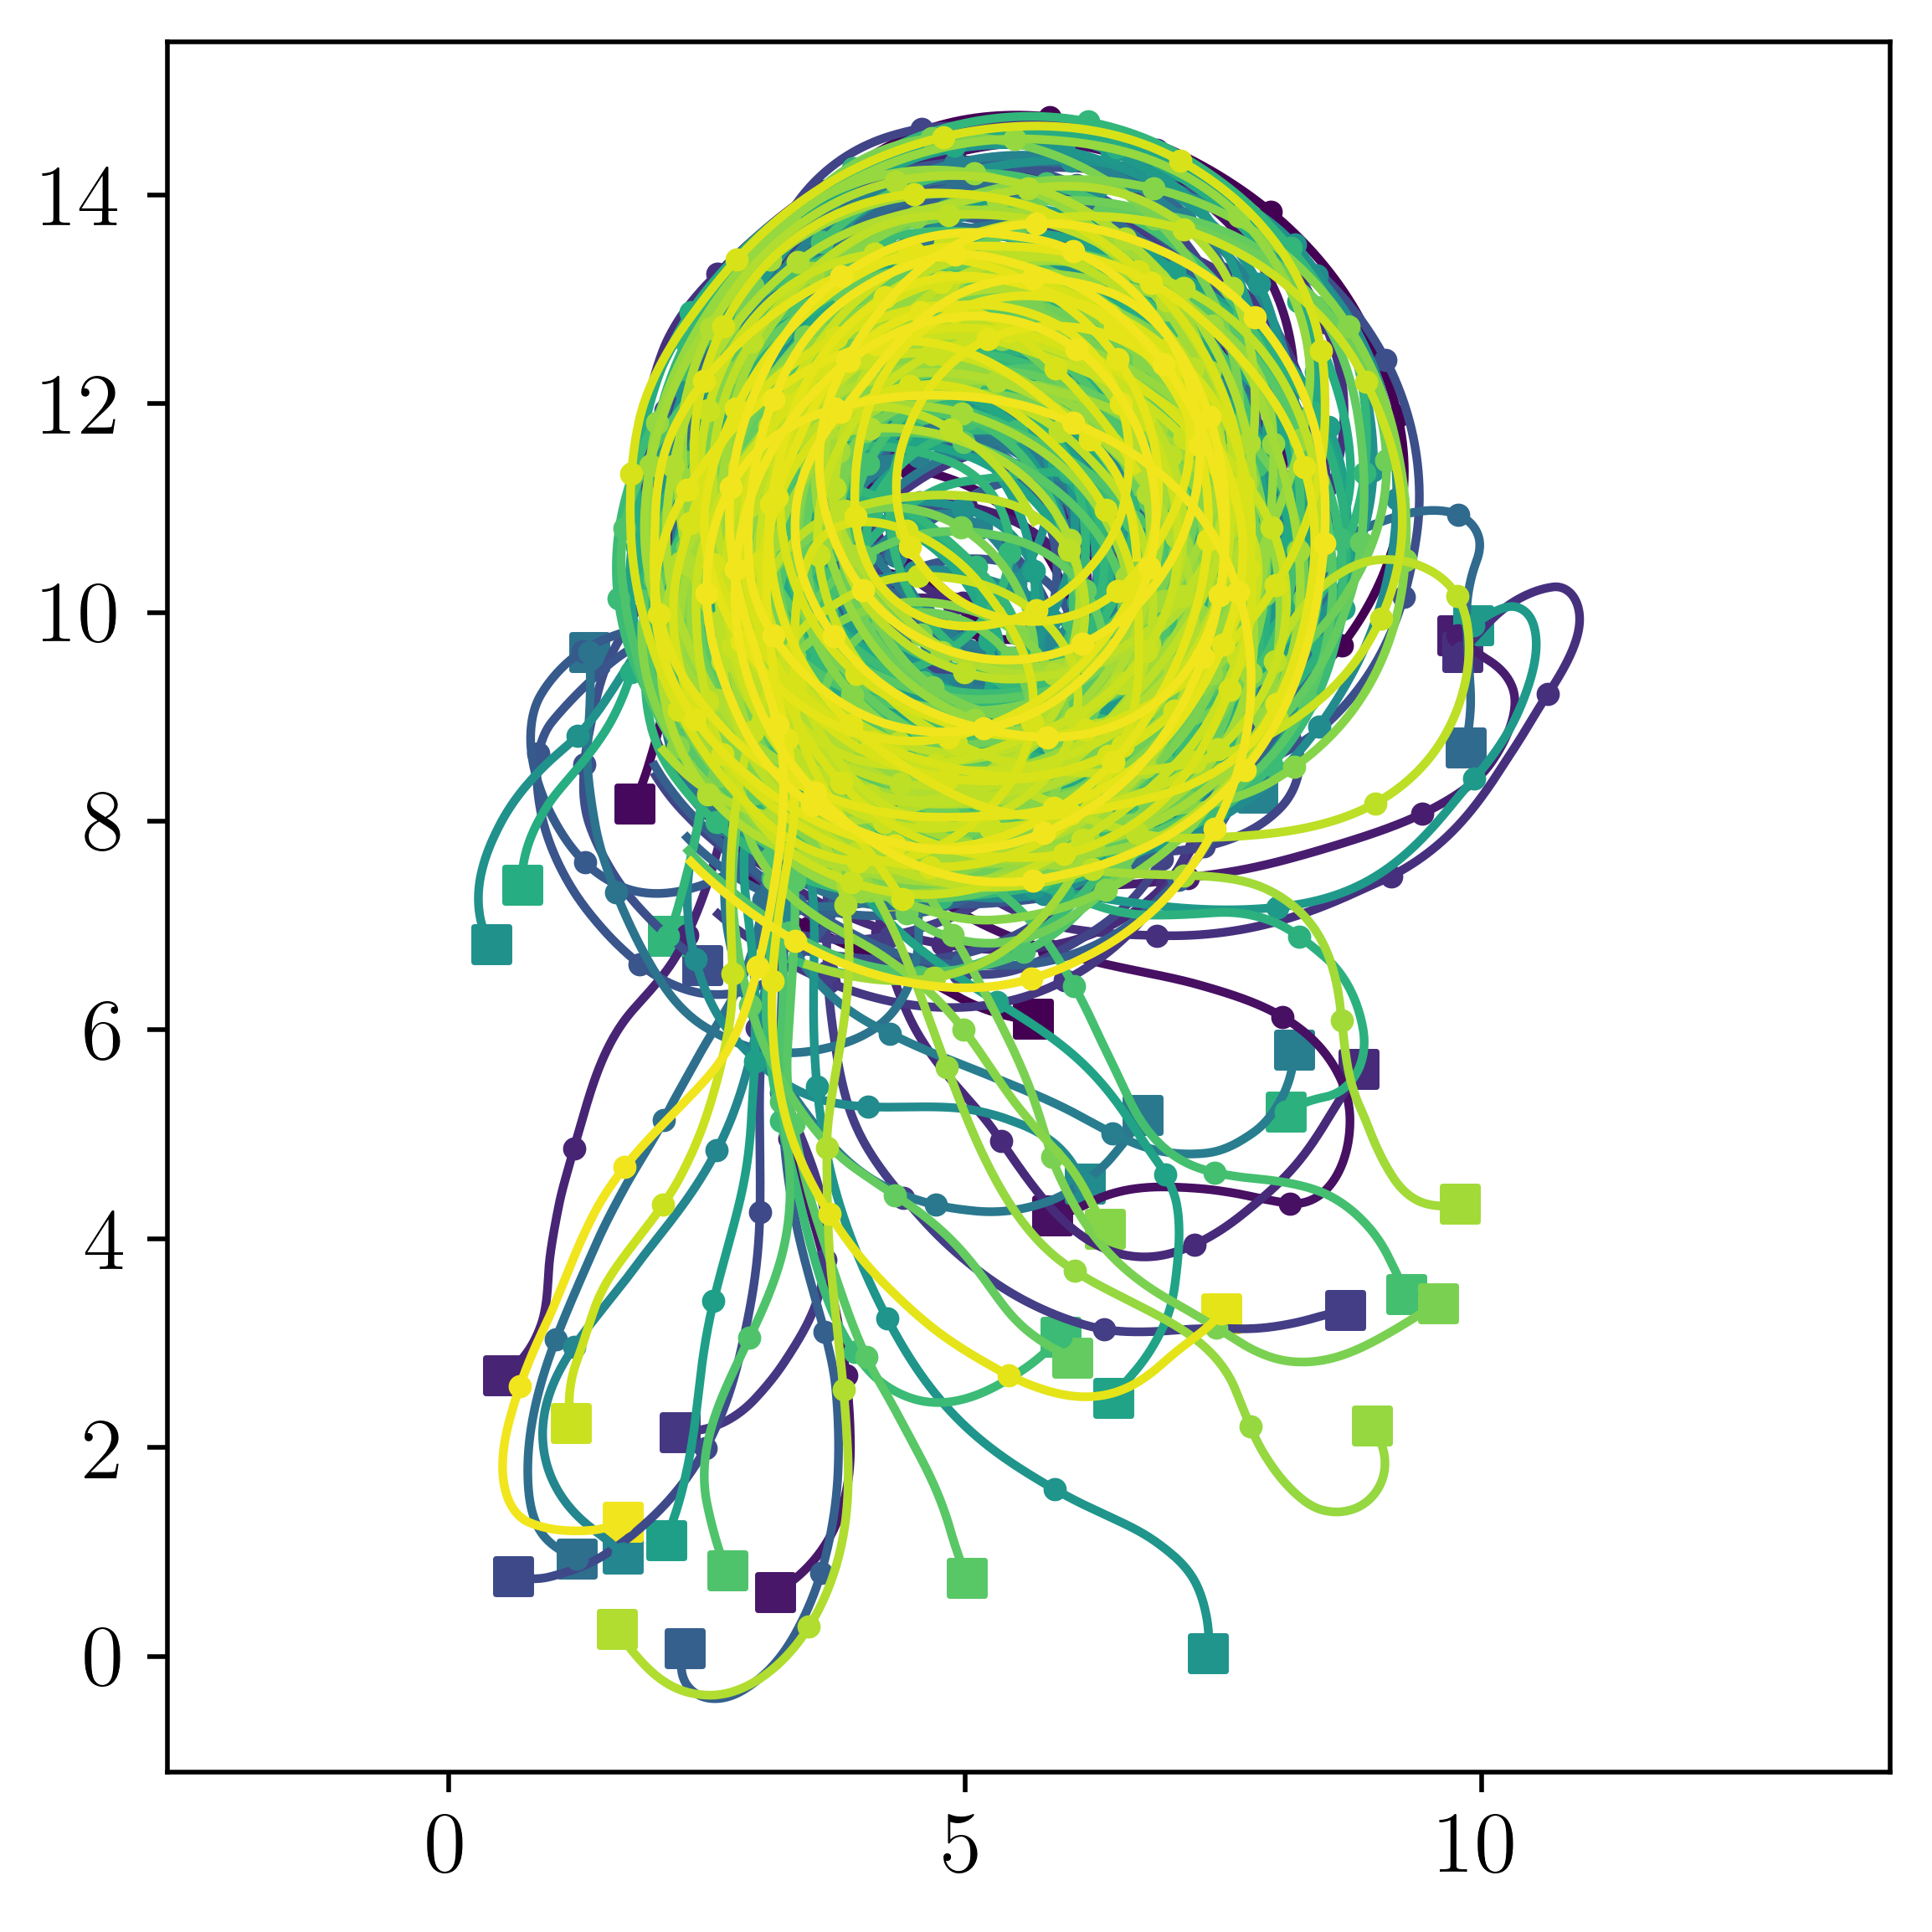

[zjl3070:19346] tcp_peer_recv_connect_ack: invalid header type: 213
[zjl3070:19346] tcp_peer_recv_connect_ack: invalid header type: 50
[zjl3070:19346] tcp_peer_recv_connect_ack: invalid header type: 5
[zjl3070:19346] tcp_peer_recv_connect_ack: invalid header type: 0
[zjl3070:19346] tcp_peer_recv_connect_ack: invalid header type: 32
[zjl3070:19346] tcp_peer_recv_connect_ack: invalid header type: 0
[zjl3070:19346] tcp_peer_recv_connect_ack: invalid header type: 0


In [6]:
def ini_particle(name='ptc2D'):
    tptc = particleClass.particle2D(name=name)
    tptc.u = u
    prb1.add_obj(tptc)
    return tptc

update_fun, update_order, eval_dt = '1fe', (0, 0), 0.01
nptc, max_t, calculate_fun = 50, 100, 'do_dbgBokaiZhang'

problem_kwargs = {
    'ini_t':           np.float64(0),
    'update_fun':      '1fe',
    'update_order':    (0, 0),
    'eval_dt':         eval_dt,
    'calculate_fun':   calculate_fun_dict[calculate_fun],
    'prbHandle':       prbHandle_dict[calculate_fun],
    'rltHandle':       rltHandle_dict[calculate_fun],
    'ptcHandle':       ptcHandle_dict[calculate_fun],
    'fileHandle':      'try_dbgBokaiZhang',
    'save_every':      np.int64(1),
    'nptc':            np.int64(nptc),
    'overlap_epsilon': np.float64(0),
    'un':              np.float64(1), 
    'ln':              np.float64(-1),
    'Xlim':            np.float64(20),
    'attract':         np.float64(1),
    'align':           np.float64(1),
    'viewRange':       np.float64(1),
    'rot_noise':       0,
    'trs_noise':       0,
    'seed':            10,
    'tqdm_fun':        tqdm_notebook,
}
    
doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
prb1 = doPrb1.do_calculate(ini_t=problem_kwargs['ini_t'], max_t=max_t, eval_dt=eval_dt, )

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize=np.array((9, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
cmap = plt.get_cmap('viridis')
for obji in prb1.obj_list:
    color = cmap(obji.index / prb1.n_obj)
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], color=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
sps.set_axes_equal(axi)


In [2]:
# doPrb1.dbg_AlignAttract2D()
prb1.obj_list[0].U
# prb1.polar, prb1.milling_Daniel2014, prb1.speed

NameError: name 'prb1' is not defined

In [3]:

# %matplotlib notebook
%matplotlib inline

figsize = np.array((9, 9)) * 5
dpi = 50 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
markevery = 0.1
resampling_fct, interp1d_kind = None, 'linear'

sps.show_fig_fun(prb1, sps.core_trajectory2D, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct)

NameError: name 'np' is not defined

In [6]:
prb1.polar, prb1.milling_Daniel2014

(0.18452212844177576, 0.05067309143633628)